In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from htc.fonts.set_font import set_font
from htc.utils.colors import lighten_color
from htc_projects.rat.neighbor_analysis import neighbor_matrix, neighbor_matrix_subjects
from htc_projects.rat.settings_rat import settings_rat
from htc_projects.species.settings_species import settings_species
from htc_projects.species.tables import baseline_table

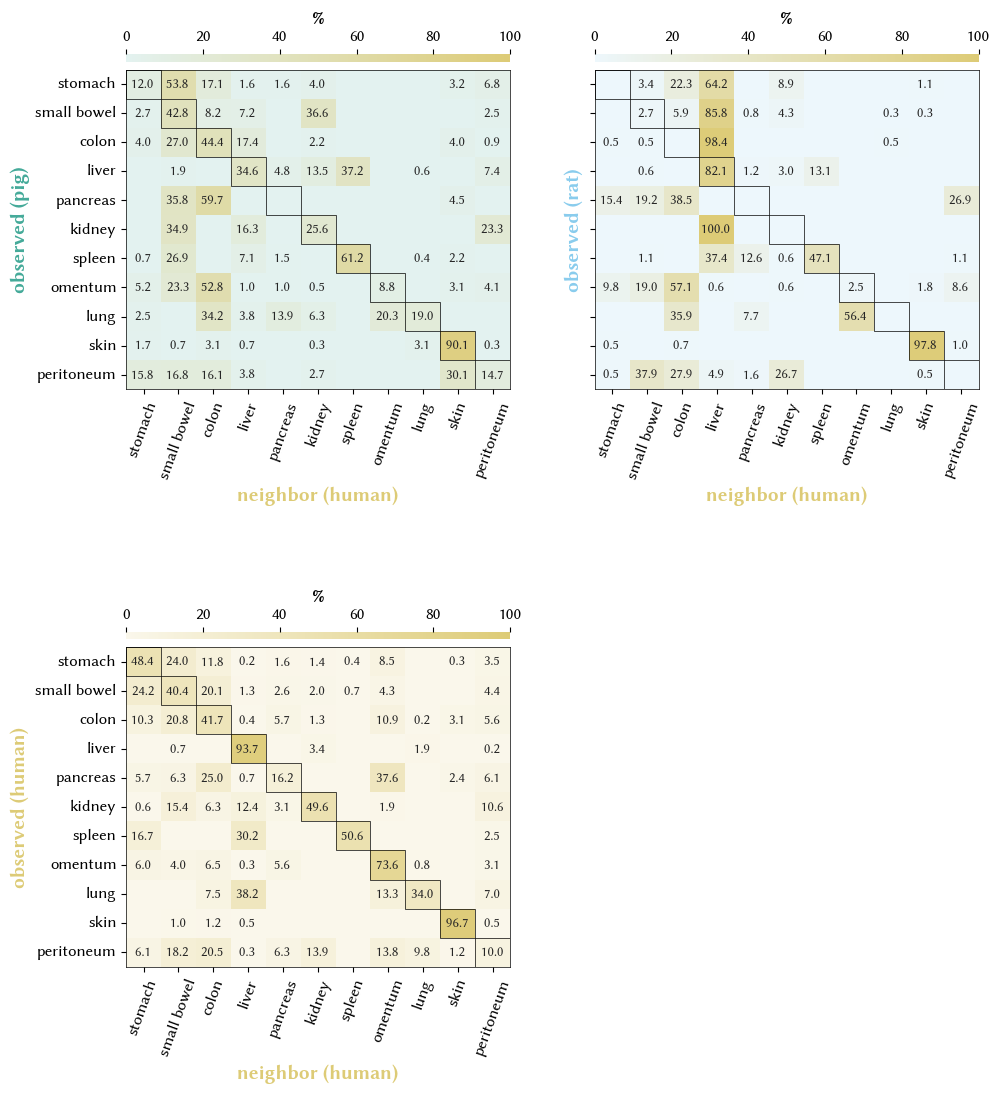

In [2]:
df = baseline_table(settings_species.label_mapping_organs)

base_opacity = 0.85
set_font(font_size=14, font_family="sans-serif")
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(
    2, 2, figsize=(11, 12.5), sharey=True, gridspec_kw={"wspace": 0.22, "hspace": 0.5}
)
ax4.axis("off")


def add_neighbor_matrix(species_observed: str, species_neighbor: str, ax) -> None:
    if species_observed == species_neighbor:
        cm_subjects, labels = neighbor_matrix_subjects(df[df.species_name == species_observed])
    else:
        cm_subjects, labels = neighbor_matrix(
            df[df.species_name == species_observed], df[df.species_name == species_neighbor]
        )

    labels = [settings_rat.labels_paper_renaming.get(label, label) for label in labels]
    cmap = mpl.colors.LinearSegmentedColormap.from_list(
        "species_cmap",
        [
            lighten_color(settings_species.species_colors[species_observed], base_opacity),
            settings_species.species_colors[species_neighbor],
        ],
    )

    cm_subjects = cm_subjects * 100
    text = np.vectorize(lambda x: "" if x < 0.1 else f"{x:.1f} ")(cm_subjects)
    res = sns.heatmap(
        cm_subjects,
        annot=text,
        annot_kws={"size": 10},
        fmt="s",
        xticklabels=labels,
        yticklabels=labels,
        cmap=cmap,
        cbar_kws={"aspect": 50, "pad": 0.02, "location": "top"},
        vmin=0,
        vmax=100,
        ax=ax,
    )

    for i in range(len(labels)):
        ax.add_patch(plt.Rectangle((i, i), 1, 1, fill=False, edgecolor="black", lw=0.5))

    cbar = ax.collections[0].colorbar
    cbar.set_label("%", fontweight="bold")

    # Make frame visible
    for spine in res.spines.values():
        spine.set_linewidth(0.5)
        spine.set_visible(True)

    for t in ax.xaxis.get_ticklabels():
        t.set_rotation(70)

    ax.set_xlabel(
        f"neighbor ({species_neighbor})", color=settings_species.species_colors[species_neighbor], fontweight="bold"
    )
    ax.set_ylabel(
        f"observed ({species_observed})", color=settings_species.species_colors[species_observed], fontweight="bold"
    )


for species_observed, species_neighbor, ax in [
    ("pig", "human", ax1),
    ("rat", "human", ax2),
]:
    add_neighbor_matrix(species_observed, species_neighbor, ax)

add_neighbor_matrix(species_observed="human", species_neighbor="human", ax=ax3)

fig.savefig(settings_species.paper_dir / "nearest_neighbor_base.pdf", bbox_inches="tight")

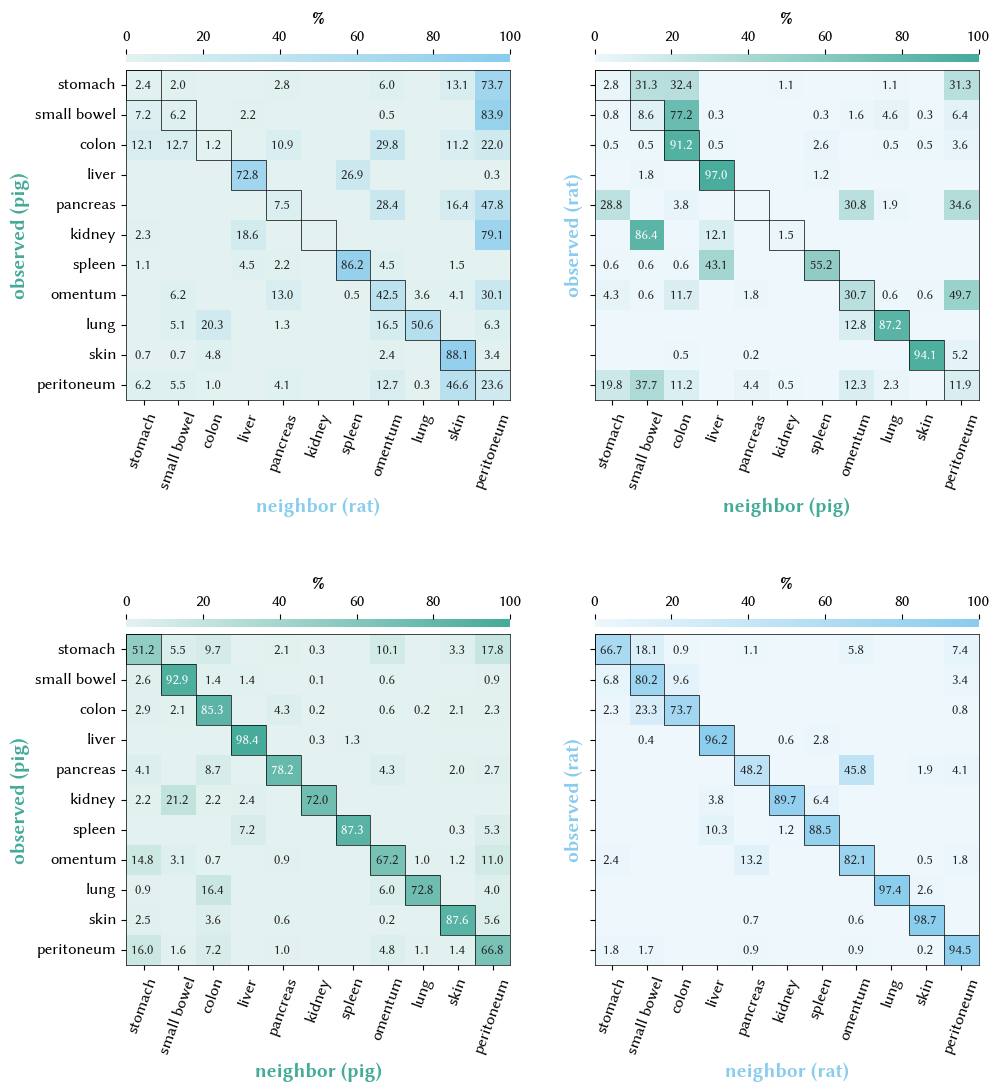

In [3]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(
    2, 2, figsize=(11, 12.5), sharey=True, gridspec_kw={"wspace": 0.22, "hspace": 0.42}
)

for species_observed, species_neighbor, ax in [
    ("pig", "rat", ax1),
    ("rat", "pig", ax2),
]:
    add_neighbor_matrix(species_observed, species_neighbor, ax)

add_neighbor_matrix(species_observed="pig", species_neighbor="pig", ax=ax3)
add_neighbor_matrix(species_observed="rat", species_neighbor="rat", ax=ax4)

fig.savefig(settings_species.paper_dir / "nearest_neighbor_suppl_base.pdf", bbox_inches="tight")